Build a regression model.

In [3]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('joined_dataframe_four.csv')

# Calculate the average distance for duplicate Station ID values
avg_distances = df.groupby('Station ID')['Distance'].mean()

# Create a new DataFrame with Station ID and average distance columns
result_df = pd.DataFrame({'Station ID': avg_distances.index, 'Average Distance': avg_distances.values})

# Save the new DataFrame to a CSV file
result_df.to_csv('average_distances.csv', index=False)



In [5]:
# # Repeat for ratings
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('joined_dataframe_yelp.csv')

# Calculate the average distance for duplicate Station ID values
avg_rating = df.groupby('Station ID')['Rating'].mean()

# Create a new DataFrame with Station ID and average distance columns
result_df = pd.DataFrame({'Station ID': avg_rating.index, 'Average Rating': avg_rating.values})

# Save the new DataFrame to a CSV file
result_df.to_csv('average_rating.csv', index=False)

In [9]:
import sqlite3
import pandas as pd

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Read the average_rating.csv file into a pandas DataFrame
average_rating_df = pd.read_csv('average_rating.csv')

# Read the average_distance.csv file into a pandas DataFrame
average_distance_df = pd.read_csv('average_distances.csv')

# Create tables in the SQLite database
average_rating_df.to_sql('average_rating', conn, index=False)
average_distance_df.to_sql('Average_Distance', conn, index=False)

# Commit the changes to the database
conn.commit()

# Perform the join operation
query = '''
    SELECT average_rating.*, Average_Distance."Average Distance"
    FROM average_rating
    INNER JOIN Average_Distance ON average_rating."Station ID" = Average_Distance."Station ID"
'''

joined_df = pd.read_sql(query, conn)

# Save the joined DataFrame to a CSV file
joined_df.to_csv('regression_model.csv', index=False)

# Close the database connection
conn.close()


Provide model output and an interpretation of the results. 

                            OLS Regression Results                            
Dep. Variable:         Average Rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.09496
Date:                Mon, 05 Jun 2023   Prob (F-statistic):              0.758
Time:                        17:32:52   Log-Likelihood:                -70.326
No. Observations:                 141   AIC:                             144.7
Df Residuals:                     139   BIC:                             150.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5555      0.092  

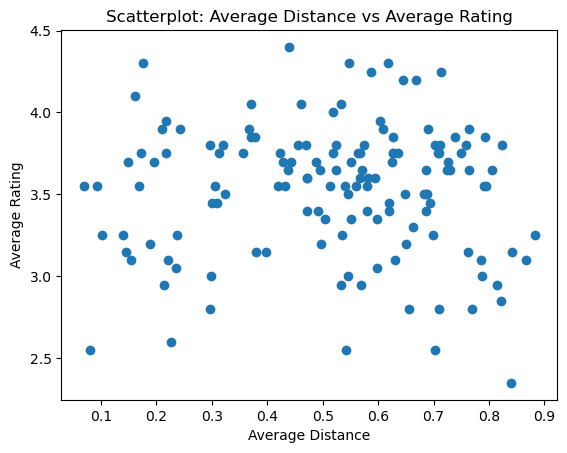

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the regression_model.csv file into a pandas DataFrame
df = pd.read_csv('regression_model.csv')

# Define the dependent variable (y) and independent variable (X)
y = df['Average Rating']
X = df['Average Distance']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())

# Create a scatterplot of the data
plt.scatter(X['Average Distance'], y)
plt.xlabel('Average Distance')
plt.ylabel('Average Rating')
plt.title('Scatterplot: Average Distance vs Average Rating')
plt.show()

## Overall, the regression model does not perform well in explaining the variability in the Average Rating based on the Average Distance variable. 
# The p-value for the Average Distance variable is not statistically significant, suggesting that it does not have a meaningful relationship with the Average Rating.

# Stretch

How can you turn the regression model into a classification model?